# Credit Card Fraud Detection

Credit card fraud occurs when an unauthorized person uses someone's credit card information to make a purchase and is a growing issue in countries all around the world. In 2018, $24.26 billion was lost due to credit card fraud worldwide, with the US accounting for almost 40% of all cases. The severity of this issue emphasizes the importance of being able to understand transaction data and create classification models that can quickly and effectively identify fradulent transactions and alert appropriate personnel. With billions of dollars on the line, even a 0.1% improvement in identifying fraud can save millions of dollars.

Table of Contents:
- Data Exploration
- Data Manipulation
- Data Modeling:
    - Metrics and Objective
    - Logistic Regression
    - Linear Discriminant Analysis (LDA)
    - K-Nearest Neighbors (KNN)
    - Support Vector Machine (SVM)
    - Decision Tree
    - Extreme Gradient Boost (XGBoost)
    - Isolation Forest
    - Random Forest
- Conclusion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("credit_data.csv")

# Data Exploration

Dimensions

In [3]:
print('The credit card fraud data table has ' + str(data.shape[0]) + ' rows and ' + str(data.shape[1]) + ' columns.')

The credit card fraud data table has 284807 rows and 31 columns.


Column Names

In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Data

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Checking for Missing Data/Values

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No missing values in data.

Fraudulent vs Authentic Transactions

In [8]:
class_counts = data.Class.value_counts()
print('There are ' + str(class_counts[0]) + ' authentic transactions and ' + str(class_counts[1])
      + ' fraudulent transactions in the dataset. ' + str("%.3f" %((class_counts[1]/class_counts[0])*100)) + 
      '% of transactions are fraudulent.')

There are 284315 authentic transactions and 492 fraudulent transactions in the dataset. 0.173% of transactions are fraudulent.


Fradulent vs Authentic Transaction Amounts

In [9]:
print('Data Amount Stats')
round(data['Amount'].describe(),2)

Data Amount Stats


count    284807.00
mean         88.35
std         250.12
min           0.00
25%           5.60
50%          22.00
75%          77.16
max       25691.16
Name: Amount, dtype: float64

In [10]:
Fraud = data[data["Class"] == 1]
Authentic = data[data["Class"] == 0]

In [11]:
print('Fraud Amount Stats')
Fraud.Amount.describe()

Fraud Amount Stats


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
print('Authentic Amount Stats')
Authentic.Amount.describe()

Authentic Amount Stats


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Distribution of Features by Transaction Type

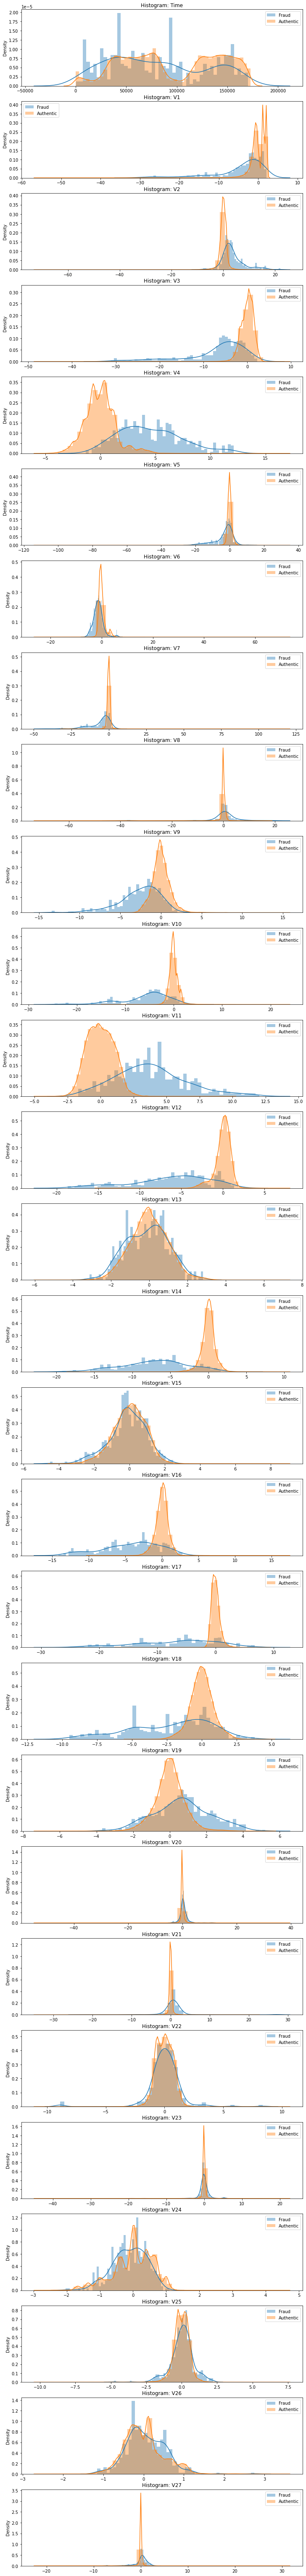

In [13]:
features = data.iloc[:,0:28].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(data[features]):
 ax = plt.subplot(gs[i])
 sns.distplot(data[c][data.Class == 1], bins=50,label = 'Fraud')
 sns.distplot(data[c][data.Class == 0], bins=50,label = 'Authentic')
 ax.set_xlabel("")
 ax.set_title("Histogram: " + str(c))
 plt.legend()
plt.show()

Feature Correlation

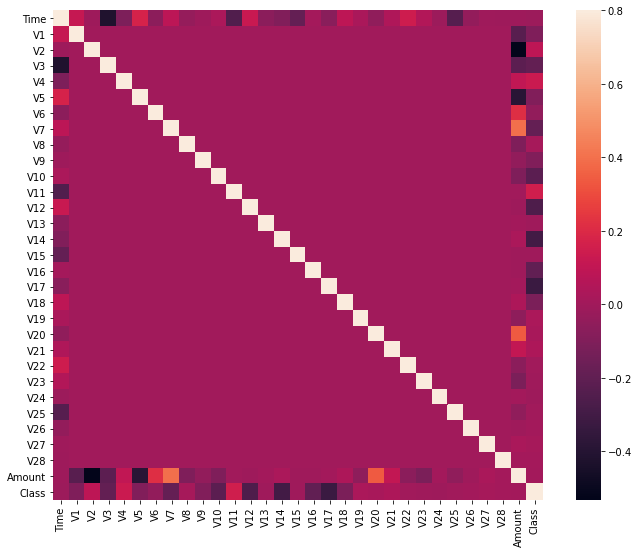

In [14]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

The features 'Amount' and 'Time' are correlated to many of the other features (strongly correlated in some cases), while the V1-V28 features are not at all correlated. I will remove consideration of 'Amount' and 'Time' in building my models to avoid multicollinearity.

# Data Manipulation

Feature Standardization:
Scaling the data to avoid extreme values that may interfere with the functioning of the model.

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))

In [17]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0


Removing 'Amount' and 'Time' columns to avoid multicollinearity.

In [18]:
data_new = data.drop(['Amount','Time'],axis=1)
data_new.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


# Data Modeling

Model Evaluation Metrics:
- Precision: (True Positives/All Predicted Positives) Measure of accuracy amongst predicted positives. Important when cost of false positives is high.
- Recall: (True Positives/All Actual Positives) Measure of model's ability to identify positives. Important when cost of false negative is high.
- F1-Score: (2*Precision*Recall/(Precision+Recall)) Balance between precision and recall. 
- Matthews Correlation Coefficient: Correlation coefficient between the observed and predicted binary classifications. Provides "balanced" assessment of classifiers (doesn't matter which class is considered to be the positive class).
- Receiver Operating Characteristic (ROC) Area Under the Curve (AUC): ROC curve models the tradeoff between specificity (proportion of true negatives out of all actual negatives) and sensitivity (recall) by graphing (1-specificity) vs sensitivity. AUC indicates how well the model is able to distinguish between the two classes.

Given the objective of building a credit card fraud detector and the nature of the credit card transcation data, I don't want to focus too much on the accuracy of my models because accuracy is sensitive to class imbalance; so many transactions are authentic that if we were to just predict that all transactions were authentic, we would already achieve approximately 98% accuracy. 

Accuracy ignores the false positive and false negative rates that can have important business impacts. Falsely identifying fraudulent transactions as authentic is clearly an undesireable outcome, as it results in us missing instances of credit card fraud. Falsely identifying authentic transactions as fraudulent can also be pretty undesireable. These false alarms can require more labor hours to validate/process and annoy customers if they are too frequent (resulting in lost business). As a result, an ideal model would minimize both false positive and false negatives, with some prioritization on minimizing false negatives.

F1, recall, and MCC are particulary useful in evaluating the performance of my models because they can evaluate/take into account how well the model minimizes the number fraudulent transactions we classify as authentic.

Split data into training and testing sets.

In [19]:
from sklearn.model_selection import train_test_split

80% of the data will be put in the training set and 20% of the data will be used for the test set.

In [20]:
train, test = train_test_split(data_new, test_size=0.2,random_state = 123)

In [21]:
train_x, train_y = train.iloc[:,:-1], train.iloc[:,-1]
test_x, test_y = test.iloc[:,:-1], test.iloc[:,-1]

In [22]:
train.shape[0]/data_new.shape[0]

0.7999978933102065

In [23]:
train.shape, test.shape

((227845, 29), (56962, 29))

# Logistic Regression

Building the Logistic Regression Model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
pred_ylr = logreg.predict(test_x)

Logistic Regression Prediction Confusion Matrix

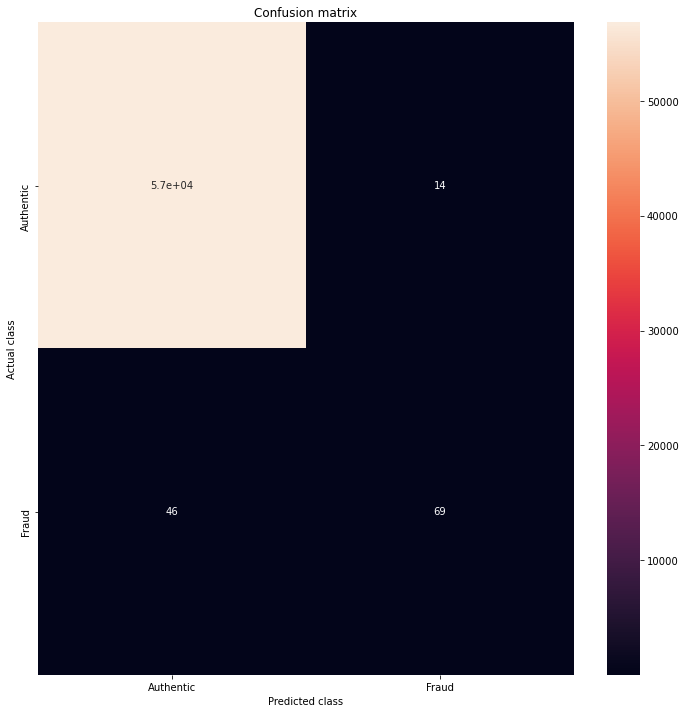

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, pred_ylr)
LABELS = ["Authentic", "Fraud"]
plt.figure(figsize=(12, 12))
sns.heatmap(confusion_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True);
plt.title('Confusion matrix')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show()

Model Evaluation Metrics

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
MCC=matthews_corrcoef(test_y,pred_ylr)
print('Logistic Regression')
print(classification_report(test_y, pred_ylr))
print('Matthews Correlation Coefficient: {}.'.format(MCC))

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.83      0.60      0.70       115

    accuracy                           1.00     56962
   macro avg       0.92      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Matthews Correlation Coefficient: 0.7057658284323329.


ROC Curve

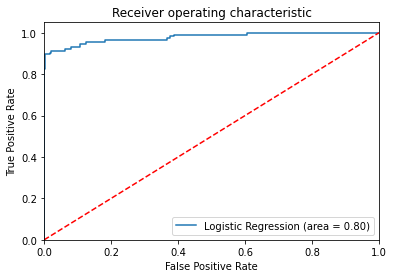

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(test_y, logreg.predict(test_x))
fpr, tpr, thresholds = roc_curve(test_y, logreg.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [28]:
print('AUC Score: ' + str("%.3f" %logit_roc_auc))

AUC Score: 0.800


# Linear Discriminant Analysis (LDA)

Building the LDA Model

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(train_x, train_y)
pred_ylda = lda.predict(test_x)

LDA Prediction Confusion Matrix

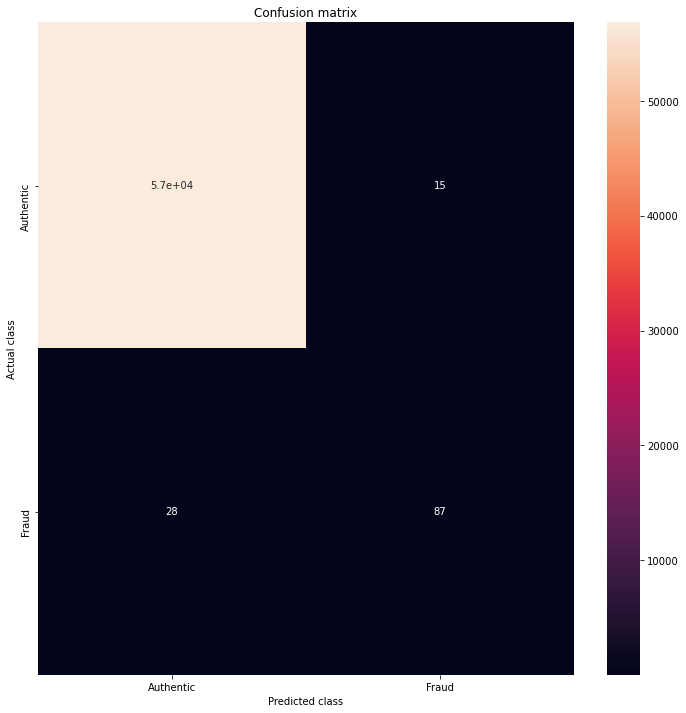

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, pred_ylda)
LABELS = ["Authentic", "Fraud"]
plt.figure(figsize=(12, 12))
sns.heatmap(confusion_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True);
plt.title('Confusion matrix')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show()

Model Evaluation Metrics

In [31]:
from sklearn.metrics import classification_report
MCC=matthews_corrcoef(test_y,pred_ylda)
print('LDA')
print(classification_report(test_y, pred_ylda))
print('Matthews Correlation Coefficient: {}.'.format(MCC))

LDA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.85      0.76      0.80       115

    accuracy                           1.00     56962
   macro avg       0.93      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Matthews Correlation Coefficient: 0.8029141112810976.


ROC Curve

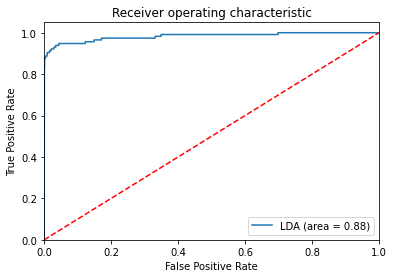

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lda_roc_auc = roc_auc_score(test_y, lda.predict(test_x))
fpr, tpr, thresholds = roc_curve(test_y, lda.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LDA (area = %0.2f)' % lda_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LDA_ROC')
plt.show()

In [33]:
print('AUC Score: '+ str("%.3f" %lda_roc_auc))

AUC Score: 0.878


# K Nearest Neighbors (KNN)

Building the Baseline KNN Model

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
pred_yknn = knn.predict(test_x)

KNN Prediction Confusion Matrix

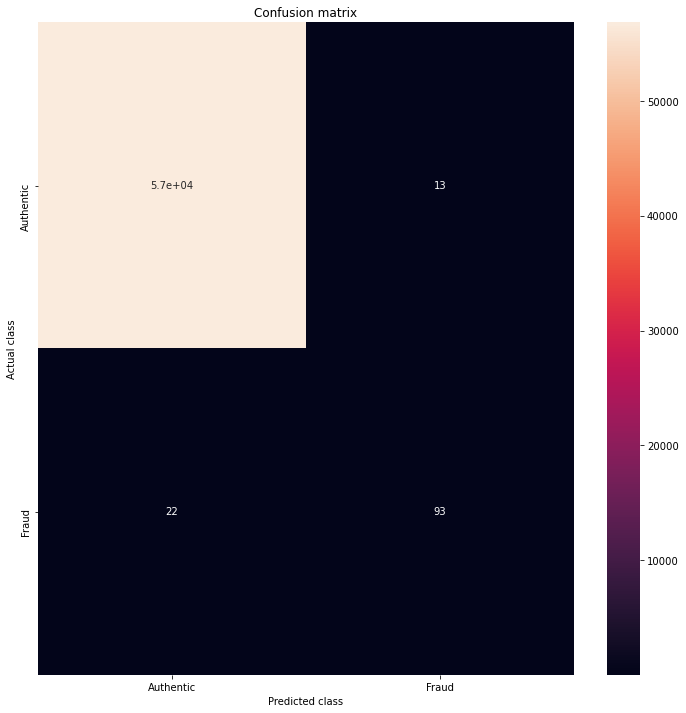

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, pred_yknn)
LABELS = ["Authentic", "Fraud"]
plt.figure(figsize=(12, 12))
sns.heatmap(confusion_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True);
plt.title('Confusion matrix')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show()

Model Evaluation Metrics

In [36]:
MCC=matthews_corrcoef(test_y,pred_yknn)
print('KNN')
print(classification_report(test_y, pred_yknn))
print('Matthews Correlation Coefficient: {}.'.format(MCC))

KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.88      0.81      0.84       115

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Matthews Correlation Coefficient: 0.8420228789464124.


ROC Curve

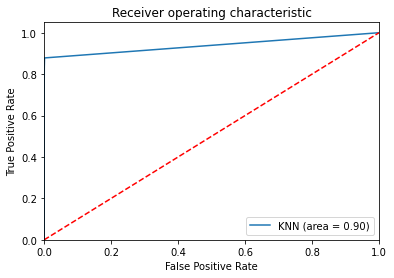

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(test_y, pred_yknn)
fpr, tpr, thresholds = roc_curve(test_y, knn.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [38]:
print('AUC Score: '+ str("%.3f" %knn_roc_auc))

AUC Score: 0.904


Tuning Hyperparameters

In [ ]:
#Hyperparameters to tune
n_neighbors = np.arange(3,11,2)
params = {'n_neighbors':n_neighbors}
#KNN Model
knn_2 = KNeighborsClassifier()
#GridSearch
from sklearn.model_selection import GridSearchCV
knn_gs = GridSearchCV(knn_2, param_grid = params, cv=5)
#Fit the model
knn_mod = knn_gs.fit(train_x,train_y)
#Best Value
print('Best n_neighbors:', knn_mod.best_estimator_.get_params()['n_neighbors'])

In [ ]:
knn_new = KNeighborsClassifier(n_neighbors = knn_mod.best_estimator_.get_params()['n_neighbors'])
knn_mod_new = knn_new.fit(train_x,train_y)
pred_yknncv = knn_mod_new.predict(test_x)

KNN Prediction Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, pred_yknncv)
LABELS = ["Authentic", "Fraud"]
plt.figure(figsize=(12, 12))
sns.heatmap(confusion_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True);
plt.title('Confusion matrix')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show()

Model Evaulation Metrics

In [ ]:
MCC=matthews_corrcoef(test_y,pred_yknncv)
print('KNN Gridsearch CV')
print(classification_report(test_y, pred_yknncv))
print('Matthews Correlation Coefficient: {}.'.format(MCC))

ROC Curve

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn2_roc_auc = roc_auc_score(test_y, pred_yknncv)
fpr, tpr, thresholds = roc_curve(test_y, knn_mod_new.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn2_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [ ]:
print('AUC Score: '+ str("%.3f" %knn2_roc_auc))

# Support Vector Machine (SVM)

In [ ]:
from sklearn import svm

SVM = svm.SVC(probability=True)
SVM.fit(train_x, train_y)
pred_ysvm = SVM.predict(test_x)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, pred_ysvm)
LABELS = ["Authentic", "Fraud"]
plt.figure(figsize=(12, 12))
sns.heatmap(confusion_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True);
plt.title('Confusion matrix')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
MCC=matthews_corrcoef(test_y,pred_ysvm)
print('SVM')
print(classification_report(test_y, pred_ysvm))
print('Matthews Correlation Coefficient: {}.'.format(MCC))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
svm_roc_auc = roc_auc_score(test_y, pred_ysvm)
fpr, tpr, thresholds = roc_curve(test_y, SVM.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

In [ ]:
print('AUC Score: '+ str("%.3f" %svm_roc_auc))

# Decision Tree

In [ ]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

Decision Tree Baseline Model Building

In [ ]:
dt = tree.DecisionTreeClassifier()
dt.fit(train_x, train_y)
pred_ydt = dt.predict(test_x)

In [ ]:
tree.plot_tree(dt)
plt.show()

Decision Tree Prediction Confustion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, pred_ydt)
LABELS = ["Authentic", "Fraud"]
plt.figure(figsize=(12, 12))
sns.heatmap(confusion_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True);
plt.title('Confusion matrix')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show()

Model Evaluation Metrics

In [ ]:
print('Decision Tree')
print(classification_report(test_y, pred_ydt))
MCC=matthews_corrcoef(test_y,pred_ydt)
print('Matthews Correlation Coefficient: {}'.format(MCC))

ROC Curve

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(test_y, pred_ydt)
fpr, tpr, thresholds = roc_curve(test_y, dt.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DT (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

In [ ]:
print('AUC Score: '+ str("%.3f" %dt_roc_auc))

# Extreme Gradient Boost (XGBoost)

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Baseline XGBoost Model

In [ ]:
xgb = XGBClassifier()
xgb.fit(train_x,train_y)
pred_yxgb = xgb.predict(test_x)

In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
plot_tree(xgb)
plt.show()

XGBoost Prediction Confustion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, pred_yxgb)
LABELS = ["Authentic", "Fraud"]
plt.figure(figsize=(12, 12))
sns.heatmap(confusion_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True);
plt.title('Confusion matrix')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show()

Model Evaluation Metrics

In [ ]:
print('XGBoost')
print(classification_report(test_y, pred_yxgb))
MCC=matthews_corrcoef(test_y,pred_yxgb)
print('Matthews Correlation Coefficient: {}'.format(MCC))

ROC Curve

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
xgb_roc_auc = roc_auc_score(test_y, pred_yxgb)
fpr, tpr, thresholds = roc_curve(test_y, xgb.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGB (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

In [ ]:
print('AUC Score: '+ str("%.3f" %xgb_roc_auc))

Tuning Hyperparameters

In [ ]:
xgb2 = XGBClassifier(seed=123, n_jobs = -1)

In [ ]:
params = {
    'learning_rate': np.arange(.01, .1, .01),
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange (3, 10, 1),
    #'subsample': np.arange(0.8, 1, 0.1),
    #'colsample_bytree': np.arange(0.3, 0.8, 0.1),
    #'gamma': [0,1,5]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=xgb2,
    param_grid=params,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)

grid_search.fit(train_x, train_y)

In [ ]:
grid_search.best_params_

In [ ]:
params2 = {
    'learning_rate': .02,
    'n_estimators': 900,
    'max_depth': 8
    #'subsample': np.arange(0.8, 1, 0.1),
    #'colsample_bytree': np.arange(0.3, 0.8, 0.1),
    #'gamma': [0,1,5]
}
xgb2best = XGBClassifier(learning_rate = 0.02, n_estimators = 900, max_depth = 8)
xgb2best.fit(train_x,train_y)
pred_y2best = xgb2best.predict(test_x)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, pred_y2best)
LABELS = ["Authentic", "Fraud"]
plt.figure(figsize=(12, 12))
sns.heatmap(confusion_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True);
plt.title('Confusion matrix')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
print('XGBoost Gridsearch CV')
print(classification_report(test_y, pred_y2best))
MCC=matthews_corrcoef(test_y,pred_y2best)
print('Matthews Correlation Coefficient: {}'.format(MCC))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
xgb2best_roc_auc = roc_auc_score(test_y, pred_y2best)
fpr, tpr, thresholds = roc_curve(test_y, xgb2best.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGB (area = %0.2f)' % xgb2best_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

In [ ]:
xgb3 = XGBClassifier(seed=123, n_jobs = 10)

In [ ]:
params = {
    'learning_rate': np.arange(0.02,0.03,0.01),
    'n_estimators': np.arange(900, 3300, 200),
    'max_depth': np.arange(8,9,1)
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb3,
    param_grid=params,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)

In [ ]:
grid_search.fit(train_x, train_y)

In [ ]:
grid_search.best_params_

In [ ]:
eval_set = [(train_x, train_y), (test_x, test_y)]
eval_metric = ["auc","error"]
xgb = XGBClassifier()
%time xgb.fit(train_x, train_y, eval_metric=eval_metric, eval_set=eval_set, verbose=True)
plt.figure()
plt.show

# Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest
ifc=IsolationForest(max_samples=len(train_x),
 contamination=len(Fraud)/float(len(Authentic)),random_state=1)
ifc.fit(train_x)
scores_pred = ifc.decision_function(train_x)
pred_yif = ifc.predict(test_x)

In [ ]:
# Reshape the prediction values to 0 for valid, 1 for fraud. 
pred_yif[pred_yif == 1] = 0
pred_yif[pred_yif == -1] = 1
n_errors = (pred_yif != test_y).sum()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, pred_yif)
LABELS = ["Authentic", "Fraud"]
plt.figure(figsize=(12, 12))
sns.heatmap(confusion_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True);
plt.title('Confusion matrix')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
MCC=matthews_corrcoef(test_y,pred_yif)
print('Isolation Forest')
print(classification_report(test_y, pred_yif))
print('Matthews Correlation Coefficient {}'.format(MCC))

In [ ]:
isofor_roc_auc = roc_auc_score(test_y, pred_yif)
fpr, tpr, thresholds = roc_curve(test_y, pred_yif)
plt.figure()
plt.plot(fpr, tpr, label='IsoFor (area = %0.2f)' % isofor_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('IsoFor_ROC')
plt.show()

In [ ]:
print('AUC Score: '+ str("%.3f" %isofor_roc_auc))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_x, train_y)
# predictions
pred_yrf = rfc.predict(test_x)

In [ ]:
#plotting one of the trees
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree.plot_tree(rfc.estimators_[0])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, pred_yrf)
LABELS = ["Authentic", "Fraud"]
plt.figure(figsize=(12, 12))
sns.heatmap(confusion_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True);
plt.title('Confusion matrix')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print('Random Forest')
print(classification_report(test_y, pred_yrf))
MCC=matthews_corrcoef(test_y,pred_yrf)
print('Matthews Correlation Coefficient: {}'.format(MCC))

In [ ]:
rf_roc_auc = roc_auc_score(test_y, pred_yrf)
fpr, tpr, thresholds = roc_curve(test_y, pred_yrf)
plt.figure()
plt.plot(fpr, tpr, label='RF (area = %0.3f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [ ]:
print('AUC Score: '+ str("%.3f" %rf_roc_auc))

Tuning Hyperparameters

In [ ]:
n_estimators = [50,200,500,1000]
max_depth = [5, 10,50,100]
min_samples_split = [2, 5, 15]
min_samples_leaf = [1, 2, 10] 
from sklearn.model_selection import GridSearchCV
hypar = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)
rf2 = RandomForestClassifier(random_state = 1)
gridrf = GridSearchCV(rf2, hypar, cv = 5, verbose = 1, 
                      n_jobs = 12)
bestrf = gridrf.fit(train_x,train_y)

In [ ]:
gridrf.best_params_

In [ ]:
rfcv = RandomForestClassifier(random_state = 1, max_depth = 50,     n_estimators = 1000, min_samples_split = 2, min_samples_leaf = 1)
                                   
rfcv.fit(train_x,train_y)
y_predrfcv = rfcv.predict(test_x)

In [ ]:
#plotting one of the trees
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree.plot_tree(rfcv.estimators_[0])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, y_predrfcv)
LABELS = ["Authentic", "Fraud"]
plt.figure(figsize=(12, 12))
sns.heatmap(confusion_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True);
plt.title('Confusion matrix')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print('Random Forest Gridsearch CV')
print(classification_report(test_y, y_predrfcv))
MCC=matthews_corrcoef(test_y,y_predrfcv)
print('Matthews Correlation Coefficient: {}'.format(MCC))

In [ ]:
rfcv_roc_auc = roc_auc_score(test_y, y_predrfcv)
fpr, tpr, thresholds = roc_curve(test_y, y_predrfcv)
plt.figure()
plt.plot(fpr, tpr, label='RFCV (area = %0.2f)' % rfcv_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RFCV_ROC')
plt.show()

In [ ]:
print('AUC Score: '+ str("%.3f" %rfcv_roc_auc))

# Conclusion

In [ ]:
!pip install tabulate

In [ ]:
from IPython.display import HTML, display
import tabulate
table = [["Model","Precision","Recall","F1 Score","Matthews Correlation Coefficient","ROC AUC"],
         ["Logistic Regression", 0.83,0.60,0.70,0.706,0.800],
         ["Linear Discriminant Analysis", 0.85,0.76,0.80, 0.803, 0.878],
         ["K-Nearest Neighbors", 0.88,0.81,0.84, 0.842,0.904],
         ["K-Nearest Neighbors GSCV",0.92,0.80,0.86, 0.858,0.900],
         ["Support Vector Machine",0.94,0.71,0.81, 0.819, 0.856] ,
         ["Decision Tree", 0.77,0.81,0.79,0.788, 0.904],
         ["XGBoost",0.94,0.81,0.87,0.871,0.904] ,
         ["XGBoost GSCV",0.92,0.80,0.86, 0.858, 0.900],
         ["Isolation Forest", 0.38,0.32,0.35,0.349,0.660],
         ["Random Forest",0.93,0.79,0.85,0.857,0.896],
         ["Random Forest GSCV", 0.95,0.80,0.87,0.871,0.900]
   ]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

   From the results table above, we can see that the K-Nearest Neighbors, Support Vector Machine, XGBoost, and Random Forest models all perform relatively well, with the Random Forest (with GridSearch Cross Validation) and the XGBoost models performing the best overall (the Random Forest model has a slightly higher precision, but slightly lower recall than the XGBoost model). Both Random Forest and XGBoost are pretty interpretable, as their decision trees can both be visualized. The XGBoost model works particulary well with unbalanced datasets like the one we are dealing with in this project; however, as a practical matter, it is also harder to tune given the number of hyperparameters there are, and it can easily encounter overfitting, as seen with my GSCV XGBoost model. The hyperparameters of both the random forest and XGBoost model can be tuned further to develop the most optimal model.